In [1]:
# import packeges
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import mrmr
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from mrmr import mrmr_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import os.path
import json

In [2]:
# import data from csv 
cnv = pd.read_csv('dataset_hg19/dataset/cnv.csv', sep=' ')

cnv.head()

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-3C-AALI,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-3C-AALK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-4H-AAAK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5L-AAT1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5T-A9QA,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
miRNA = pd.read_csv('dataset_hg19/dataset/mirna.csv', sep=' ')

miRNA.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-3,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-3C-AALI,49201,98691,49035,148591,5095,3263,3566,133,41683,2231,...,0,0,52,0,4,8,383,547,1503,80378
TCGA-3C-AALK,57278,114320,57540,164553,18464,2114,8364,113,40723,2245,...,0,0,22,0,22,11,459,263,6620,152218
TCGA-4H-AAAK,67196,134563,67607,136918,20429,2162,10556,139,50848,2056,...,0,0,13,0,7,5,123,212,6666,158568
TCGA-5L-AAT1,94243,188921,94346,211457,21076,2657,12104,272,94610,3903,...,0,0,23,0,12,11,235,529,5352,196557
TCGA-5T-A9QA,49313,97721,49623,127544,2134,1769,8190,104,28306,2792,...,0,0,72,0,3,23,186,146,445,127728


In [4]:
mRNA = pd.read_csv('dataset_hg19/dataset/mrna.csv', sep=' ')

mRNA.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-3C-AALI,436.55,0,0,130.32,8,13924.87,290,1,0,1633,...,110,825,2470,365,1110,10123,2425,748,1704,0
TCGA-3C-AALK,461.69,0,0,151.08,4,26490.85,1224,0,0,1878,...,133,1058,2088,424,1468,13756,1888,1694,161,0
TCGA-4H-AAAK,631.87,1,9,362.77,8,22525.79,804,1,1,1925,...,115,997,2467,33,1823,9498,1955,2072,440,0
TCGA-5L-AAT1,259.26,0,0,125.12,5,18903.93,323,1,0,971,...,55,697,1213,66,630,5421,1732,698,71,0
TCGA-5T-A9QA,600.72,1,1,446.68,0,6084.91,787,7,0,1670,...,55,547,1548,4,615,6160,2132,843,7,0


In [5]:
proteins = pd.read_csv('dataset_hg19/dataset/proteins.csv', sep=' ')

proteins.head()

,14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf,A-Raf_pS299,...,p27_pT157,p27_pT198,p38_MAPK,p38_pT180_Y182,p53,p62-LCK-ligand,p70S6K,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
TCGA-3C-AALI,-0.000752,0.022553,0.021112,0.101796,-0.382850,-0.108997,0.103860,-0.335720,0.139450,0.148123,...,-0.076626,-0.231296,-0.169884,0.040360,-0.043975,1.293687,0.783984,0.162565,-0.667649,-0.102581
TCGA-3C-AALK,-0.202252,0.077041,0.153997,0.299107,-0.438903,-0.460678,-0.358195,0.474016,0.376476,-0.160318,...,-0.219547,-0.340080,0.208381,0.365363,-0.136875,0.680809,0.612644,-0.131174,0.419210,-0.118623
TCGA-4H-AAAK,-0.208434,0.062566,0.034209,0.429696,-0.102852,-0.499466,-0.433138,0.143794,0.339525,-0.221161,...,-0.070647,-0.471717,-0.052702,0.068514,-0.080364,0.300677,0.819253,-0.520017,0.003252,-0.855659
TCGA-5L-AAT1,-0.465476,0.141845,0.232721,0.427772,-0.231596,0.276124,-0.411702,0.736283,0.398665,-0.063979,...,-0.145362,-0.582255,0.346637,0.289421,-0.225658,0.591818,0.623455,-0.559783,0.510494,-0.601296
TCGA-5T-A9QA,-0.354823,0.156575,0.249023,1.197526,0.447913,1.001215,0.307314,0.581762,0.316779,-0.085146,...,0.076588,-0.325001,0.166015,-1.064492,0.181296,-0.226434,0.842169,0.280629,0.524148,-0.500144


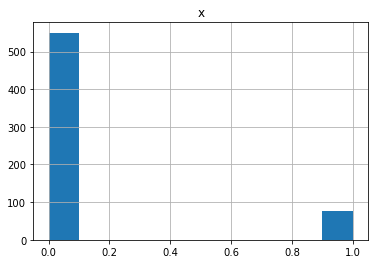

In [6]:
#Import label
label = pd.read_csv('dataset_hg19/dataset/labels_pfi.csv', sep=' ')

label.hist()
plt.show()

In [7]:
def checkNaNValues(dataset):
    if dataset.isna().sum().sum() == 0:
        print(f"Non sono presenti dati NaN")
    else:
        for column in dataset:
            if dataset[column].isna().sum() == 0:
                print(f"Nella colonna {column} non sono presenti dati NaN")
            else:
                print(f"Nella colonna {column} sono presenti: {dataset[column].isna().sum()}")

In [8]:
checkNaNValues(cnv)

Non sono presenti dati NaN


In [9]:
checkNaNValues(miRNA)

Non sono presenti dati NaN


In [10]:
checkNaNValues(proteins)

Non sono presenti dati NaN


In [11]:
#Data normalization with MinMaxScaler
def dataNormalization(scaler, data):
    scl = scaler()
    model = scl.fit(data)
    scaled_data = model.transform(data)
    
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

In [12]:
scaled_proteins = dataNormalization(MinMaxScaler, proteins)

scaled_proteins

,14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf,A-Raf_pS299,...,p27_pT157,p27_pT198,p38_MAPK,p38_pT180_Y182,p53,p62-LCK-ligand,p70S6K,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
TCGA-3C-AALI,0.403974,0.533935,0.406886,0.239167,0.119029,0.252247,0.279890,0.532114,0.597189,0.300498,...,0.574520,0.255794,0.403903,0.562600,0.584565,0.692510,0.475394,0.435960,0.231455,0.480984
TCGA-3C-AALK,0.303318,0.565050,0.448557,0.284533,0.100122,0.186528,0.107078,0.759309,0.692356,0.218197,...,0.516624,0.208243,0.540288,0.667240,0.566300,0.584796,0.447657,0.322088,0.608802,0.473838
TCGA-4H-AAAK,0.300230,0.556784,0.410993,0.314558,0.213474,0.179280,0.079048,0.666655,0.677520,0.201963,...,0.576942,0.150703,0.446154,0.571665,0.577410,0.517987,0.481104,0.171347,0.464385,0.145520
TCGA-5L-AAT1,0.171829,0.602057,0.473243,0.314115,0.170048,0.324214,0.087066,0.832895,0.701265,0.243903,...,0.546676,0.102386,0.590137,0.642789,0.548844,0.569156,0.449407,0.155931,0.640495,0.258829
TCGA-5T-A9QA,0.227103,0.610469,0.478355,0.491097,0.399251,0.459712,0.355984,0.789540,0.668388,0.238255,...,0.636586,0.214834,0.525013,0.206878,0.628854,0.425347,0.484813,0.481729,0.645235,0.303887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-W8-A86G,0.738564,0.385956,0.297579,0.338530,0.221547,0.366266,0.434856,0.389442,0.131184,0.375467,...,0.581830,0.504856,0.145524,0.303551,0.555919,0.646125,0.308584,0.221007,0.377118,0.191574
TCGA-WT-AB41,0.362785,0.581322,0.553549,0.548152,0.296392,0.457906,0.320336,0.760588,0.660413,0.214366,...,0.552110,0.300270,0.685554,0.765590,0.583359,0.589030,0.541331,0.291261,0.460639,0.383711
TCGA-XX-A899,0.207706,0.650906,0.433922,0.432427,0.223976,0.314551,0.200134,0.807222,0.608169,0.245557,...,0.593486,0.161780,0.552642,0.532947,0.613404,0.604636,0.485170,0.127698,0.663534,0.245199
TCGA-Z7-A8R5,0.347305,0.504144,0.477080,0.393421,0.247037,0.316564,0.191963,0.783289,0.706199,0.254789,...,0.606149,0.262403,0.732537,0.816809,0.567604,0.474557,0.385110,0.239462,0.652143,0.426395


In [13]:
def filterFeaturesWithLowVariability(data, alfa) -> pd.DataFrame:
    #Delete columns with standard deviation < alfa (0.10?)
    for column in data:
        if data[column].std() < alfa:
            #print(f'column: {column} has standard deviation < {alfa}, removed')
            df = data.drop(column, axis=1)
            return df
    return data

In [14]:
filterFeaturesWithLowVariability(scaled_proteins, 0.10)

,14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf,ACC1,...,p27_pT157,p27_pT198,p38_MAPK,p38_pT180_Y182,p53,p62-LCK-ligand,p70S6K,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
TCGA-3C-AALI,0.403974,0.533935,0.406886,0.239167,0.119029,0.252247,0.279890,0.532114,0.597189,0.839040,...,0.574520,0.255794,0.403903,0.562600,0.584565,0.692510,0.475394,0.435960,0.231455,0.480984
TCGA-3C-AALK,0.303318,0.565050,0.448557,0.284533,0.100122,0.186528,0.107078,0.759309,0.692356,0.631482,...,0.516624,0.208243,0.540288,0.667240,0.566300,0.584796,0.447657,0.322088,0.608802,0.473838
TCGA-4H-AAAK,0.300230,0.556784,0.410993,0.314558,0.213474,0.179280,0.079048,0.666655,0.677520,0.627053,...,0.576942,0.150703,0.446154,0.571665,0.577410,0.517987,0.481104,0.171347,0.464385,0.145520
TCGA-5L-AAT1,0.171829,0.602057,0.473243,0.314115,0.170048,0.324214,0.087066,0.832895,0.701265,0.490456,...,0.546676,0.102386,0.590137,0.642789,0.548844,0.569156,0.449407,0.155931,0.640495,0.258829
TCGA-5T-A9QA,0.227103,0.610469,0.478355,0.491097,0.399251,0.459712,0.355984,0.789540,0.668388,0.480302,...,0.636586,0.214834,0.525013,0.206878,0.628854,0.425347,0.484813,0.481729,0.645235,0.303887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-W8-A86G,0.738564,0.385956,0.297579,0.338530,0.221547,0.366266,0.434856,0.389442,0.131184,0.128102,...,0.581830,0.504856,0.145524,0.303551,0.555919,0.646125,0.308584,0.221007,0.377118,0.191574
TCGA-WT-AB41,0.362785,0.581322,0.553549,0.548152,0.296392,0.457906,0.320336,0.760588,0.660413,0.586332,...,0.552110,0.300270,0.685554,0.765590,0.583359,0.589030,0.541331,0.291261,0.460639,0.383711
TCGA-XX-A899,0.207706,0.650906,0.433922,0.432427,0.223976,0.314551,0.200134,0.807222,0.608169,0.631212,...,0.593486,0.161780,0.552642,0.532947,0.613404,0.604636,0.485170,0.127698,0.663534,0.245199
TCGA-Z7-A8R5,0.347305,0.504144,0.477080,0.393421,0.247037,0.316564,0.191963,0.783289,0.706199,0.495060,...,0.606149,0.262403,0.732537,0.816809,0.567604,0.474557,0.385110,0.239462,0.652143,0.426395


In [15]:
#TO DO: su ogni dataset, genero i vari holdout e sui dati di training faccio
#feature selection e traino usando RandomForest
#usando 10 multiple holdout 
#misura di performance AUC, auc interne e poi media fuori 

#Feature seletion using multivariate (mrmr, maximum relevant minimum redundancy e boruta)
#mrmr piu' e' basso piu' la feature non ci interessa, piu' e' alto piu e' informativa

In [16]:
filterFeaturesWithLowVariability(dataNormalization(MinMaxScaler, proteins), 0.10)

,14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf,ACC1,...,p27_pT157,p27_pT198,p38_MAPK,p38_pT180_Y182,p53,p62-LCK-ligand,p70S6K,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
TCGA-3C-AALI,0.403974,0.533935,0.406886,0.239167,0.119029,0.252247,0.279890,0.532114,0.597189,0.839040,...,0.574520,0.255794,0.403903,0.562600,0.584565,0.692510,0.475394,0.435960,0.231455,0.480984
TCGA-3C-AALK,0.303318,0.565050,0.448557,0.284533,0.100122,0.186528,0.107078,0.759309,0.692356,0.631482,...,0.516624,0.208243,0.540288,0.667240,0.566300,0.584796,0.447657,0.322088,0.608802,0.473838
TCGA-4H-AAAK,0.300230,0.556784,0.410993,0.314558,0.213474,0.179280,0.079048,0.666655,0.677520,0.627053,...,0.576942,0.150703,0.446154,0.571665,0.577410,0.517987,0.481104,0.171347,0.464385,0.145520
TCGA-5L-AAT1,0.171829,0.602057,0.473243,0.314115,0.170048,0.324214,0.087066,0.832895,0.701265,0.490456,...,0.546676,0.102386,0.590137,0.642789,0.548844,0.569156,0.449407,0.155931,0.640495,0.258829
TCGA-5T-A9QA,0.227103,0.610469,0.478355,0.491097,0.399251,0.459712,0.355984,0.789540,0.668388,0.480302,...,0.636586,0.214834,0.525013,0.206878,0.628854,0.425347,0.484813,0.481729,0.645235,0.303887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-W8-A86G,0.738564,0.385956,0.297579,0.338530,0.221547,0.366266,0.434856,0.389442,0.131184,0.128102,...,0.581830,0.504856,0.145524,0.303551,0.555919,0.646125,0.308584,0.221007,0.377118,0.191574
TCGA-WT-AB41,0.362785,0.581322,0.553549,0.548152,0.296392,0.457906,0.320336,0.760588,0.660413,0.586332,...,0.552110,0.300270,0.685554,0.765590,0.583359,0.589030,0.541331,0.291261,0.460639,0.383711
TCGA-XX-A899,0.207706,0.650906,0.433922,0.432427,0.223976,0.314551,0.200134,0.807222,0.608169,0.631212,...,0.593486,0.161780,0.552642,0.532947,0.613404,0.604636,0.485170,0.127698,0.663534,0.245199
TCGA-Z7-A8R5,0.347305,0.504144,0.477080,0.393421,0.247037,0.316564,0.191963,0.783289,0.706199,0.495060,...,0.606149,0.262403,0.732537,0.816809,0.567604,0.474557,0.385110,0.239462,0.652143,0.426395


In [17]:
def train_model(dataset, label, num_extenal_fold, mrmrK, scaler, 
                minimumVariance, 
                model_selection_grid,
                scoring):
    
    aucs =[]
    scaled_dataset = dataNormalization(scaler, dataset)
    filtered_dataset = filterFeaturesWithLowVariability(scaled_dataset, minimumVariance)
    
    #to numpy
    XNumpy = filtered_dataset.to_numpy()
    yNumpy = label['x'].to_numpy()
    
    external_fold = StratifiedKFold(n_splits=num_extenal_fold, shuffle=True, random_state=1)
    
    for train_index, test_index in external_fold.split(filtered_dataset, label):
        
        X_train_fold, X_test_fold = XNumpy[train_index], XNumpy[test_index]
        y_train_fold, y_test_fold = yNumpy[train_index], yNumpy[test_index]
        
        df_train = pd.DataFrame(data=X_train_fold, columns=filtered_dataset.columns)
        df_test = pd.DataFrame(data=X_test_fold, columns=filtered_dataset.columns)
        
        #feature selection
        selected_features = mrmr_classif(X=df_train, y=y_train_fold, K=mrmrK)

        X_train_selected_feature = df_train[selected_features]
        X_test_selected_feature = df_test[selected_features]

        clf = GridSearchCV(estimator=RandomForestClassifier(),
                           scoring=scoring,
                           param_grid=model_selection_grid, 
                           cv=2, 
                           n_jobs=-1)
        clf.fit(X_train_selected_feature, y_train_fold)

        auc = clf.best_estimator_.score(X_test_selected_feature, y_test_fold)
        print('auc: {:.3f} using params {}:'.format(auc, clf.best_params_))
        aucs.append(auc)
    
    return np.mean(aucs)

In [18]:
def trainAllDataset(listaDataset, 
                    label, 
                    num_extenal_fold, 
                    mrmrK, 
                    scaler, 
                    minimumVariance, 
                    model_selection_grid,
                    scoring):
    roc_aucList =[]
    for dataset in listaDataset:
        roc_aucList.append(train_model(dataset, label, num_extenal_fold, mrmrK, scaler, minimumVariance, 
                          model_selection_grid,
                          scoring ))
    return np.mean(roc_aucList)

In [19]:
model_selection_grid_DT = [
    {},
    {'criterion': ['gini', 'entropy'],
                        'max_leaf_nodes': [None, 2, 5, 10, 50, 100],
                        'max_features': [None, 'sqrt', 'log2'],
                        'max_depth': [None, 2, 5, 10]}
]
listaDataset = [cnv, miRNA, mRNA, proteins]

In [20]:
#train_model(proteins, label, 10, 50, MinMaxScaler, 0.10, model_selection_grid_DT, 'roc_auc')

In [21]:
def addResultJsonFile(result_dict, column_name, file_name, dataset):
    
    if column_name not in result_dict:
        if os.path.exists(file_name):
            with open(file_name, 'r') as fp:
                saved_dict = json.load(fp)
                if column_name in saved_dict:
                    result_dict[column_name] = saved_dict[column_name]
                else:
                    result_dict[column_name] = {train_model(dataset,
                                                           label, 
                                                            10, 
                                                            50, 
                                                            MinMaxScaler, 
                                                            0.10, 
                                                            model_selection_grid_DT, 
                                                            'roc_auc')}
                    with open(file_name, 'w', encoding='utf-8') as fp:
                        json.dump(result_dict, fp, ensure_ascii=False, indent=4)
        else:
            result_dict[column_name] = {train_model(dataset,
                                                           label, 
                                                            10, 
                                                            50, 
                                                            MinMaxScaler, 
                                                            0.10, 
                                                            model_selection_grid_DT, 
                                                            'roc_auc')}
            with open(file_name, 'w', encoding='utf-8') as fp:
                json.dump(result_dict, fp, ensure_ascii=False, indent=4)

In [22]:
proteinsDict = {}
addResultJsonFile(proteinsDict, '50Feature', 'protein_With_50_feature.json', proteins)

100%|██████████████████████████████████████████████| 50/50 [00:08<00:00,  6.02it/s]


auc: 0.873 using params {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 2}:


100%|██████████████████████████████████████████████| 50/50 [00:08<00:00,  5.88it/s]
Process LokyProcess-2:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ale/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py", line 475, in _process_worker
    gc.collect()
KeyboardInterrupt


KeyboardInterrupt: 